In [1]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

loading MHR


In [2]:
reviews_features = pd.read_csv('data/book_sample.csv.gz')
df_agg = reviews_features[['overall','asin']].groupby(['asin']).agg(['count','mean'])
df_agg['overall'].sort_values('count',ascending=False).head(10)

,count,mean
asin,,
0007444117,1007,3.223436
0141188936,766,3.656658
030728364X,496,3.897177
0143038419,477,2.903564
0307265439,437,3.018307
0316011770,401,2.932668
0312626681,388,3.502577
0060761288,329,2.981763
0307276902,304,3.128289


In [3]:
#list_asin = ['0007444117','B00A3YN0Z0','B0074BW614','B00CMQTVK0','B0094NY3R0','B0045FM6SU','B00DVFLJDS']
#reviews_features = reviews_features[reviews_features.asin.isin(list_asin)]
reviews_features = reviews_features[reviews_features.pageRank>0]
print reviews_features.shape
reviews_features.drop('powerWithStar', axis=1, inplace=True)
reviews_features,ndcg_mhr = mhr.executeFromDf(reviews_features)
reviews_features.to_csv('data/book_sample.csv.gz', compression='gzip')

(24234, 17)
product=0002051850 ndcg=0.783847313733 (0.783847313733)
product=000224053X ndcg=0.79024800371 (0.796648693688)
product=0006393195 ndcg=0.781925019086 (0.765279049838)
product=0006530702 ndcg=0.793045111192 (0.826405387509)
product=0007157150 ndcg=0.807210570283 (0.863872406645)
product=0007167040 ndcg=0.811961991584 (0.835719098094)
product=000721278X ndcg=0.829460077004 (0.934448589521)
product=0007228023 ndcg=0.839201502211 (0.907391478663)
product=0007231601 ndcg=0.843040112063 (0.873748990879)
product=000779021X ndcg=0.835347594209 (0.766114933521)
product=0026045702 ndcg=0.838421721959 (0.869162999453)
product=0029109752 ndcg=0.840663030498 (0.865317424427)
product=006000942X ndcg=0.837607778435 (0.800944753685)
product=0060083816 ndcg=0.834963852018 (0.800592808601)
product=0060084332 ndcg=0.836271296607 (0.854575520842)
product=0060175869 ndcg=0.838733676747 (0.87566937886)
product=0060192119 ndcg=0.832207757924 (0.727793056756)
product=006019491X ndcg=0.820534794111

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


PageRank ndcg=0.770294098881
PageRank Corr=0.269278698778
HITs ndcg=0.772097593674
HITs Corr=0.273162721447
MHR ndcg=0.807258857429
MHR Corr=0.0552548806598
461
461
461


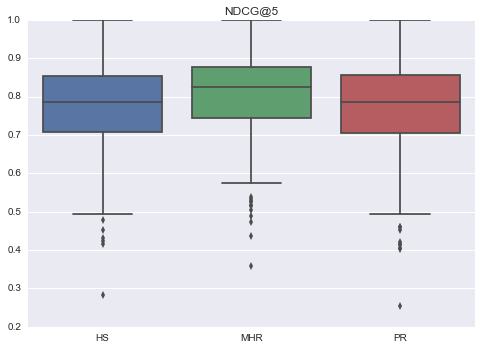

In [4]:
import seaborn as sns
k=5

ndcg_pr=ndcg.calc_ndcg(reviews_features,'pageRank',k) 
corr_pr=ndcg.calc_corr(reviews_features,'pageRank') 
print "PageRank ndcg="+str(np.mean(ndcg_pr))
print "PageRank Corr="+str(np.mean(corr_pr))

ndcg_hs=ndcg.calc_ndcg(reviews_features,'hits',k) 
corr_hs=ndcg.calc_corr(reviews_features,'hits') 
print "HITs ndcg="+str(np.mean(ndcg_hs))
print "HITs Corr="+str(np.mean(corr_hs))

#ndcg_mhr=ndcg.calc_ndcg(reviews_features,'powerWithStar',k) 
corr_mhr=ndcg.calc_corr(reviews_features,'powerWithStar') 
print "MHR ndcg="+str(np.mean(ndcg_mhr))
print "MHR Corr="+str(np.mean(corr_mhr))

print (len(ndcg_hs))
print (len(ndcg_pr))
print (len(ndcg_mhr))

tip={}
tip['HS']=ndcg_hs
tip['PR']=ndcg_pr
tip['MHR']=ndcg_mhr
df = pd.DataFrame(tip)
ax = sns.boxplot(data=df)
#ax = sns.swarmplot(data=df, color=".25")
ax.set_title('NDCG@'+str(k))

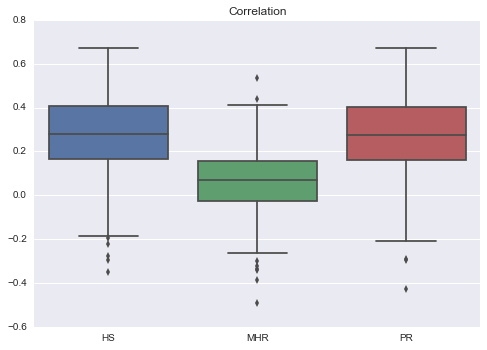

In [5]:
tip={}
tip['PR']=corr_pr
tip['HS']=corr_hs
tip['MHR']=corr_mhr
dftip=pd.DataFrame(tip)
dftip.head()
ax = sns.boxplot(data=dftip)
#ax = sns.swarmplot(data=dftip, color=".25")

ax.set_title('Correlation')